In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from lls import LinearLeastSquare

In [2]:
data = pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


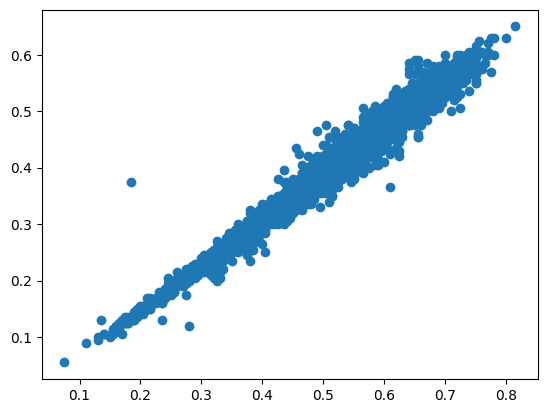

In [3]:
plt.scatter(data["Length"] , data['Diameter'])
plt.show()

In [4]:
data['Sex'].replace(["F" , "M" , "I"] , [0,1,2] , inplace=True)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
# peyda kardane coorelation 
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [6]:
# bc the value of sex columns  in corelation table , are negative , so we can remove this column .

data = data.drop(["Sex"] ,axis=1 )
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
# X = np.array(data["Length"])
# Y = np.array(data["Diameter"])
# X = X.reshape(-1, 1)
# Y = Y.reshape(-1, 1)

# nother solution for reshape :
X = np.array(data[["Length"]])
Y = np.array(data[["Diameter"]])
print(X.shape)
print(Y.shape)

(4177, 1)
(4177, 1)


In [8]:
x_train , x_test , y_train , y_test = train_test_split(X , Y )


In [9]:
# w = (X.T * X )^-1 * X.T * Y  = shibe khat 

# w = np.matmul(  np.matmul(np.linalg.inv( np.matmul(x_train.T  , x_train) ) , x_train.T ) , y_train )
# instead of numpy.matmul we use @ = ZARBE MARIXI
from numpy.linalg import inv 

w = inv(X.T @ X) @ X.T @  Y
w

array([[0.78025965]])

In [10]:
Y_pred = w * x_test # Diameter
print(Y_pred)

[[0.43304411]
 [0.41743891]
 [0.2262753 ]
 ...
 [0.31600516]
 [0.48766228]
 [0.40573502]]


In [11]:
lls = LinearLeastSquare()
lls.fit(x_train , y_train)
y_pred = lls.predict(x_test)

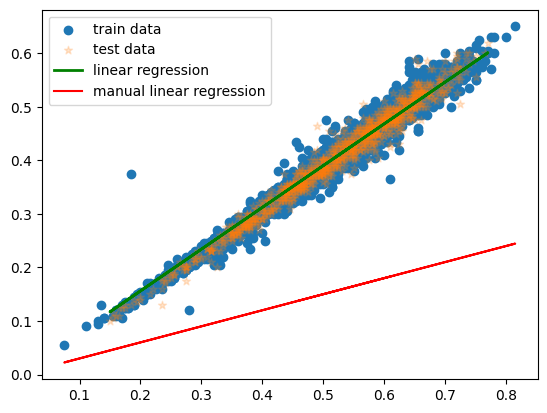

In [12]:
# plt.scatter(data["Length"] , data['Diameter']) # train data
plt.scatter(x_train , y_train , marker="o")
plt.scatter(x_test , y_test , marker="*" , alpha=0.2) # test data
plt.plot(x_test , Y_pred , color="green" , lw=2) # predictor line 
plt.plot(x_train , 0.3 * x_train , color="red")
plt.legend(["train data" , "test data" , "linear regression" , "manual linear regression"] , loc="upper left")
plt.show()

In [13]:
# predict 
new_length  = 0.49
x = new_length

Y_pred = w * new_length 
print(Y_pred)

[[0.38232723]]


In [14]:
# for classification = Accuracy 
# np.sum(y_test == y_pred) / len(y_test)


# for regression = loss or error 

# MAE loss - L1-loss
# MAE =Nnp.abs(np.sum(y_test - y_pred)) / len(y_test)

# MSE loss
# MSE = np.abs(np.sum(y_test - y_pred)) / len(y_test)


# در مسایل کلسیفیکیشین تابع ایولوییت مقدار دقت یا اکوریسی را ریترن میکنه 
#  در مسایل رگرسیون ، تابع ایولوییت مقدار لاس رو برمیگردونه 
'''
def evaluate(self , x_test , y_test , metric="mse")

    y_pred = self.predict(x_test)
    error = y_test - y_pred 
    if metric == "mae" :
        loss = np.sum(np.abs(y_test - y_pred)) / len(y_test)
    elif metric == "mse":
        loss = np.sum(np.abs(y_test - y_pred)) / len(y_test)

'''


'\ndef evaluate(self , x_test , y_test , metric="mse")\n\n    y_pred = self.predict(x_test)\n    error = y_test - y_pred \n    if metric == "mae" :\n        loss = np.sum(np.abs(y_test - y_pred)) / len(y_test)\n    elif metric == "mse":\n        loss = np.sum(np.abs(y_test - y_pred)) / len(y_test)\n\n'

In [16]:
prediction_loss = lls.evaluate(x_test , y_test , "mae")
prediction_loss

0.012700863368943925